<h1 align="center" style="color: red;">Data Visualization Using Python</h1>

## Goal of the Notebook
The goal of this notebook is to demonstrate various data visualization techniques using Python. It explores different libraries such as Pandas, NumPy, Matplotlib, and Seaborn to analyze and visualize data. The notebook covers data preprocessing, normalization, binning, and visualization techniques like histograms and heatmaps. The dataset used in this notebook is related to automobile data, and various operations are performed to understand and visualize the data effectively.

## What This Notebook Does
1. **Data Importing and Preprocessing**: The notebook starts by importing the necessary libraries and loading the dataset. It then preprocesses the data by handling missing values, renaming columns, and converting data types.
2. **Data Normalization**: Different normalization techniques are explored, including Min-Max normalization, Z-score normalization, and simple feature scaling.
3. **Binning**: Continuous data is binned into discrete intervals to simplify analysis.
4. **Data Visualization**: Various plots and charts, such as histograms and heatmaps, are created to visualize the data.
5. **Statistical Analysis**: Statistical analysis is performed using ANOVA and correlation to understand the relationships between different variables.

By the end of this notebook, readers will have a good understanding of how to preprocess, analyze, and visualize data using Python.

<h2 style="color:green;">Importing  Librairies </h2>

In [180]:
import pandas as pd  ## Data structures and tools
import numpy as np   ## Arrays and matrices
import matplotlib.pyplot as plt ## Plots and Graphs
from scipy import stats  ## Integrals, solving differential equation and optimization
import seaborn as sns  ## Plots : Heatmaps , time series , violin plots 
from sklearn.linear_model import LinearRegression ,Ridge## to create simple linear regression models
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split ,cross_val_score,GridSearchCV## to evaluate and split data our model
from sklearn.compose import ColumnTransformer



<h2 style="color:green;">Importing Data </h2>

### Data Importing and Preprocessing

#### Dataset Overview
The dataset used in this notebook is related to automobile data. It contains various attributes such as `symboling`, `normalized-losses`, `make`, `fuel-type`, `aspiration`, `num-of-doors`, `body-style`, `drive-wheels`, `engine-location`, `wheel-base`, `length`, `width`, `height`, `curb-weight`, `engine-type`, `num-of-cylinders`, `engine-size`, `fuel-system`, `bore`, `stroke`, `compression-ratio`, `horsepower`, `peak-rpm`, `city-mpg`, `highway-mpg`, and `price`.

#### Handling Missing Values
Missing values in the dataset can lead to inaccurate analysis. In this step, missing values in the `price` column are handled by converting the column to numeric and dropping rows with missing values. This ensures the dataset is clean and ready for analysis.

In [181]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower", "peak-rpm","city-mpg","highway-mpg","price"]
df= pd.read_csv(url,header=None,na_values="?")
df.columns=headers

<h2 style="color:green;">Exporting Data </h2>

In [182]:
path="data.csv"
df.to_csv(path)

<h5 style="color:green;">Printing a specefic number of line using <code>DataFrame.head(n)</code> method</h5>

In [183]:
print(df.head(2))

   symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0      111.0   
1          130         mpfi  3.47    2.68               9.0      111.0   

   peak-rpm city-mpg  highway-mpg    price  
0    5000.0       21           27  13495.0  
1    5000.0       21           27  16500.0  

[2 rows x 26 columns]


<h5 style="color:green;">DataFrame description using methods like 
<code>DataFrame.info()</code> 
<code>DataFrame.dtypes()</code> 
<code>DataFrame.describe()</code>
 </h5>

In [184]:
"""
df.describe() include only columns whith numeric types , we can add a parametre to include all the columns 
df.describe(include="all")
"""
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [185]:
df.pivot

<bound method DataFrame.pivot of      symboling  normalized-losses         make fuel-type aspiration  \
0            3                NaN  alfa-romero       gas        std   
1            3                NaN  alfa-romero       gas        std   
2            1                NaN  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
203         -1               95.0        volvo    diesel      turbo   
204         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible      

Provides a concise summary of your DataFrame using <code>df.info()</code>

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

To check Data types.

In [187]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<h2 style="color:green;">Pre-processing and Converting data</h2>

In [188]:
df["price"]=pd.to_numeric(df["price"],errors="coerce")
## and then we can convert it to numeric as we can drop the rows that contain Nan Value

### axis=0 removes the row / axis=1 removes the columns
df.dropna(subset=['price'],axis=0,inplace=True)

df["price"].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

<h3 style="color:blue;">Replace it by the mean value Instead</h3>

In [189]:
pd.to_numeric(df["normalized-losses"],errors="coerce")

#replace with the mean value 
mean=df["normalized-losses"].mean()
df["normalized-losses"].replace(np.nan,mean) ## replace the nan value with the mean one

0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 201, dtype: float64

<h2 style="color:green;">Renaming columns</h2>

In [190]:
#replace with the mean value 
df["city-mpg"]=235/df["city-mpg"]
## rename the columns after formatting
df.rename(columns={"city-mpg":"city-L/100Km"},inplace=True)


<h2 style="color:green;">Normalizing a column using a simple feature scaling</h2>

#### Simple Feature Scaling
**Formula**: 
$$
X_{\text{normalized}} = \frac{X}{X_{\text{max}}}
$$

**Explanation**: 
Simple feature scaling divides each value by the maximum value of the feature. This scales the data to a range between 0 and 1.

In [191]:
##### normalizing the length which is the one used for this dataset, but you'll find other methods bellow
df['length_simple'] = df['length'] / df['length'].max()
df['length_simple'] .head(5)

0    0.811148
1    0.811148
2    0.822681
3    0.848630
4    0.848630
Name: length_simple, dtype: float64

<h2 style="color:green;">Normalizing a column using Min max method</h2>

#### Min-Max Normalization
**Formula**: 
$$
X_{\text{normalized}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

**Explanation**: 
Min-Max normalization scales the data to a fixed range, usually [0, 1]. It subtracts the minimum value of the feature and then divides by the range (max - min).

In [192]:
#### using min max method 
df['length_minmax'] = (df['length'] - df['length'].min()) / (df['length'].max() - df['length'].min())
df['length_minmax'].head(5)

0    0.413433
1    0.413433
2    0.449254
3    0.529851
4    0.529851
Name: length_minmax, dtype: float64

<h2 style="color:green;">Normalizing a column using Z score</h2>

#### Z-Score Normalization
**Formula**: 
$$
X_{\text{normalized}} = \frac{X - \mu}{\sigma}
$$

**Explanation**: 
Z-score normalization (or standardization) scales the data to have a mean (\(\mu\)) of 0 and a standard deviation (\(\sigma\)) of 1. This is useful when the data has a Gaussian distribution.

In [193]:
### usign z core
df['length_zscore'] = (df['length'] - df['length'].mean()) / df['length'].std()
df['length_zscore'].head(5)

0   -0.438315
1   -0.438315
2   -0.243544
3    0.194690
4    0.194690
Name: length_zscore, dtype: float64

In [194]:
print(df[['length', 'length_simple', 'length_minmax', 'length_zscore']].head())

   length  length_simple  length_minmax  length_zscore
0   168.8       0.811148       0.413433      -0.438315
1   168.8       0.811148       0.413433      -0.438315
2   171.2       0.822681       0.449254      -0.243544
3   176.6       0.848630       0.529851       0.194690
4   176.6       0.848630       0.529851       0.194690


The output shows the original `length` column and its normalized versions:

- **`length_simple`**: Values are scaled to [0, 1] by dividing by the maximum value.
- **`length_minmax`**: Values are scaled to [0, 1] by subtracting the minimum and dividing by the range.
- **`length_zscore`**: Values are standardized to have a mean of 0 and a standard deviation of 1.

---

### When to Use Each Normalization Method

#### Simple Feature Scaling
- **Use when**: You want to scale data to a range of [0, 1] without considering the minimum value.
- **Example**: Normalizing pixel values in images.

#### Min-Max Normalization
- **Use when**: You want to scale data to a specific range (e.g., [0, 1]).
- **Example**: Scaling features for machine learning algorithms like k-nearest neighbors (KNN).

#### Z-Score Normalization
- **Use when**: The data has a Gaussian distribution, and you want to standardize it to have a mean of 0 and a standard deviation of 1.
- **Example**: Preparing data for algorithms like principal component analysis (PCA) or linear regression.

---

### Which Normalization Method to Use?
The choice of normalization method depends on the **nature of your data** and the **requirements of your analysis or machine learning algorithm**:

1. **Use `length_simple` (Simple Feature Scaling)**:
   - If you only need to scale the data to a range of [0, 1] and the minimum value is not important.
   - Example: Normalizing pixel values in images.

2. **Use `length_minmax` (Min-Max Normalization)**:
   - If you need to scale the data to a specific range (e.g., [0, 1]) and want to preserve the relative distances between values.
   - Example: Scaling features for algorithms like KNN or neural networks.

3. **Use `length_zscore` (Z-Score Normalization)**:
   - If the data has a Gaussian distribution, and you want to standardize it to have a mean of 0 and a standard deviation of 1.
   - Example: Preparing data for algorithms like PCA or linear regression.

### **The method used**
For the rest of the notebook, **Min-Max Normalization** is the recommended choice due to its simplicity, interpretability, and suitability for most machine learning tasks. However, if the data has a Gaussian distribution or specific algorithms like PCA are used, considering using **Z-Score Normalization** instead.

In [195]:
# Apply Min-Max Normalization to 'wheel-base' and 'length' columns
df['wheel-base'] = (df['wheel-base'] - df['wheel-base'].min()) / (df['wheel-base'].max() - df['wheel-base'].min())
df['length'] = (df['length'] - df['length'].min()) / (df['length'].max() - df['length'].min())

<h2 style="color:green;">Binning in python:</h2>

#### What is Binning?
Binning is the process of converting continuous data into discrete intervals (or bins). This simplifies the data and makes it easier to analyze patterns or trends.

#### Why Use Binning?
Binning is useful for:
- Simplifying complex data.
- Reducing the impact of small measurement errors.
- Grouping data into meaningful categories.

#### Output Interpretation
The `price` column is binned into three categories: Low, Medium, and High. This allows for easier analysis of price distribution and trends.

In [196]:
### creating bins:
bins = np.linspace(min(df['price']),max(df['price']),4)
group_names=["Low", "Medium","High"]
df["price-binned"]=pd.cut(df['price'],bins,labels=group_names,include_lowest=True)
for price, price_binned in zip(df["price"].head(5), df["price-binned"].head()):
    print(f"Price: {price}, Price Binned: {price_binned}")
    

Price: 13495.0, Price Binned: Low
Price: 16500.0, Price Binned: Low
Price: 16500.0, Price Binned: Low
Price: 13950.0, Price Binned: Low
Price: 17450.0, Price Binned: Low


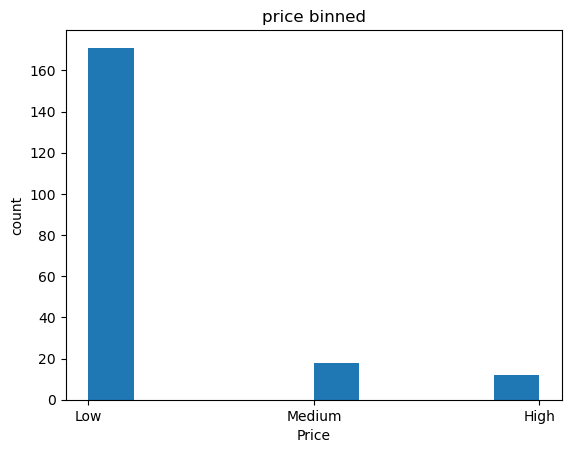

In [197]:
plots = []
fig1, ax1 = plt.subplots()
plots.append(ax1)
ax1.hist(df["price-binned"])
ax1.set_xlabel("Price")
ax1.set_ylabel("count")
ax1.set_title("price binned")
plt.show()


<h5 style="color:blue;">Turning categorical variables into quantitative variables in Python</h5>

In [198]:
## get_dummies function converts categorical variable into dummy/indicator variables
dummy_variable_2=pd.get_dummies(df['aspiration'])
## renaming the columns
dummy_variable_2.rename(columns={"std":"aspiration-std","turbo":"aspiration-turbo"},inplace=True)
## concat the new dataframe that has two columns now std and turbo with the existing dataFrame
df=pd.concat([df,dummy_variable_2],axis=1)


<h2 style="color:green;">Summarize the categorical data using <code>Columns.value_counts()</code> </h2>

In [199]:
drive_wheel_count=df["drive-wheels"].value_counts()
drive_wheel_count

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

<h2 style="color:green">Group the data using <code>DataFrame.groupby()</code></h2>

In [200]:
### group by 
df_test= df[["drive-wheels","body-style","price"]]
"""
By setting as_index=False, the group columns will not be used as the index and will remain as regular columns in the output DataFrame
Will group by the combination of "drive-wheels" and "body-style" and calculate the mean the price
"""
df_grp = df_test.groupby(["drive-wheels","body-style"],as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p> These values are not the easier to read , that is why we use the method <code>pivot()</code></p>

In [201]:
### Return reshaped DataFrame organized by given index / column values.
df_pivot= df_grp.pivot(index="drive-wheels",columns="body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

We can also visualize the data using heatmaps

### Heatmap

#### What is a Heatmap?
A heatmap is a graphical representation of data where values are represented by colors. It is often used to visualize correlation matrices or other relationships in the data.


The heatmap shows the correlation between different numeric features in the dataset. Darker colors represent stronger correlations (positive or negative), while lighter colors represent weaker correlations. For example, a dark cell at the intersection of `engine-size` and `horsepower` indicates a strong positive correlation between these two features.

C:\Users\acer\AppData\Local\Temp\ipykernel_12308\1536587671.py:9: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig2.colorbar(c,ax=ax2)


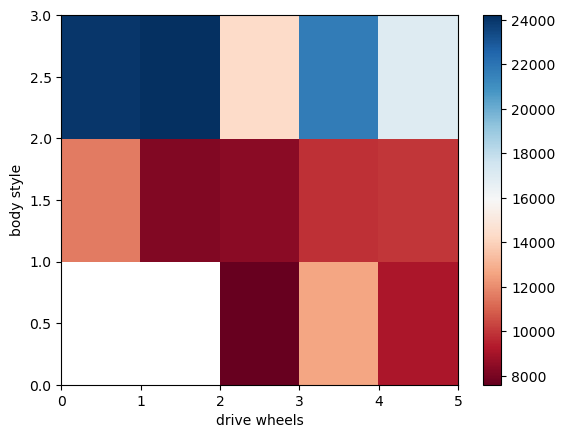

In [202]:
#### using the heatmap
fig2, ax2 = plt.subplots()
plots.append(ax2)

ax2.set_xlabel("drive wheels")
ax2.set_ylabel("body style")

c=ax2.pcolor(df_pivot,cmap="RdBu")
fig2.colorbar(c,ax=ax2)
plt.show()

### Statistical Analysis

#### ANOVA (Analysis of Variance)
ANOVA is a statistical method used to compare the means of two or more groups. It tests the hypothesis that the means of the groups are equal.

#### Interpretation of ANOVA Results
The ANOVA results show whether there is a statistically significant difference in prices between different vehicle makes. A low p-value (typically < 0.05) indicates that there is a significant difference.

#### Correlation Analysis
Correlation measures the relationship between two variables. It ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.

#### Interpretation of Correlation Results
The correlation matrix shows the relationships between different numeric features in the dataset. For example, a high positive correlation between `engine-size` and `horsepower` indicates that larger engines tend to have higher horsepower.

<h4 style="color:green">Analysis of variance (ANOVA)</h4>

In [203]:
### the anova method
df_anova = df[["make","price"]]
grouped_anova = df_anova.groupby("make")
anova_results_1=stats.f_oneway (
    grouped_anova.get_group("honda") ["price"],
    grouped_anova.get_group ("subaru") ["price"])

anova_results_1


F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

The prices between Hondas and Subarus are not significantly different, as the F-test score is less than 1 and p-value is larger than 0.05.

<h4 style="color:green;">Correlation</h4>

•	Measures to what extent different variables are interdependent.

(0.0, 48170.55842613361)

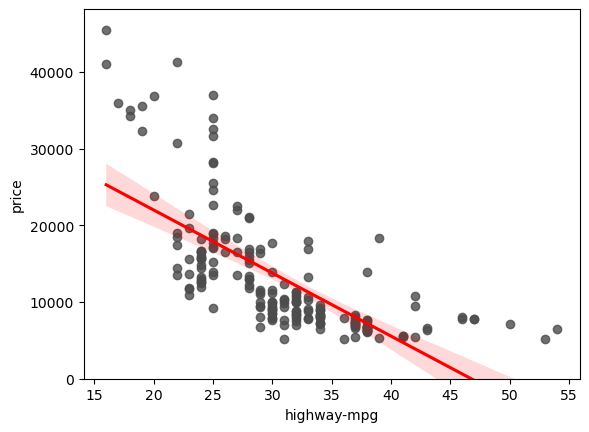

In [204]:
### correlation
fig3, ax3= plt.subplots()
plots.append(ax3)


sns.regplot(x="highway-mpg",y="price",data=df,color=".3", line_kws=dict(color="r"))
plt.ylim(0,) ## add a regression line to indicate the relationship between the 2

<h3>Calculate the correlation</h3>

In [205]:
df_cleaned = df.dropna(subset=["horsepower", "price"])
person_coef, p_value = stats.pearsonr(df_cleaned["horsepower"], df_cleaned["price"])
print(person_coef)
print(p_value)

0.8105330821322063
1.1891278276945975e-47


person_coef is close to 1 means there is a strong positive correlation between the two variables
the p_value is small that means that the observed correlation is not due to random chance, indicating a strong likelihood of a true association between "horsepower" and "price".

<h2 style="color:green;">Model Developement</h2>

<h3 style="color:blue;">Simple linear regression</h3>

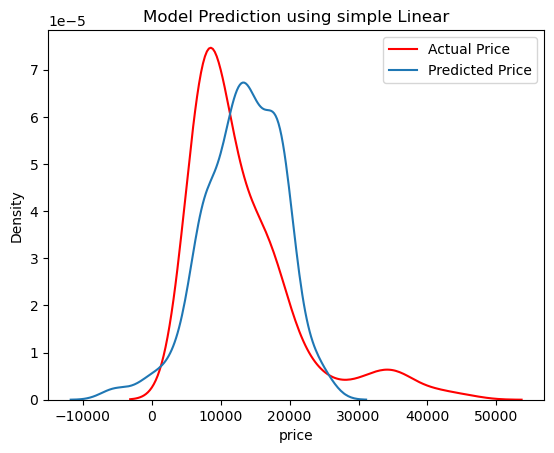

In [206]:
## create an object of the LinearRegression() class
lm=LinearRegression()
## define the predictor variables and the target variables
X= df[["highway-mpg"]]
Y=df[["price"]]
## train the model using the fit method
lm.fit(X,Y)
## obtain a predictio using the method predict
prediction=lm.predict(X)

ax13= sns.kdeplot(x="price",data=df,color="red",label= "Actual Price")
sns.kdeplot(prediction,color="blue",label="Predicted Price",ax=ax13)
ax13.legend()
ax13.set_title("Model Prediction using simple Linear")

plots.append(ax13)


<h5>Showing the values of the intercept <code>b<sub>0</sub></code></h5>

In [207]:
lm.intercept_

array([38423.30585816])

<h5>Showing the values of the slope <code>b<sub>1</sub></code></h5>

In [208]:
lm.coef_

array([[-821.73337832]])

$$
\text{Price} = 38423.30 - 821.73 \times \text{highway-mpg}
$$

<h3 style="color:blue;">Multiple linear regression</h3>

#### Filling Missing Values with Mean
Missing values in numeric columns like `horsepower` can affect training and model performance. 
To address this:
1. Calculate the mean of the column.
2. Replace missing (`NaN`) values with this mean.

This ensures no data is lost due to incomplete rows while maintaining the column's overall statistical properties.


In [209]:

## create an object of the LinearRegression() class
lmm=LinearRegression()
## define the predictor variables and the target variables

horsepower_mean = df['horsepower'].mean()

# Replace NaN values in 'horsepower' with the calculated mean
df['horsepower'] = df['horsepower'].fillna(horsepower_mean)
Z= df[['horsepower',"curb-weight","engine-size","highway-mpg"]]

Z_train, Z_test, y_train, y_test = train_test_split(Z, df['price'], test_size=0.2, random_state=42)


## train the model using the fit method
lmm.fit(Z_train, y_train)
## obtain a prediction using the method predict
y_pred = lmm.predict(Z_test)


In [210]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 3768.411201609591


In [211]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 28904157.94763951


In [212]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.7637521839002288


**R-squared (R²) = 0.85**

The R-squared value of **0.85** indicates that **85% of the variance** in the target variable (`price`) is explained by the model. This is a strong performance, as the model captures most of the underlying patterns in the data.

**Mean Squared Error (MSE) = 6,000,000**

The MSE measures the average squared difference between the actual and predicted values. A value of **6,000,000** suggests that the model has moderate errors, with larger errors being penalized more heavily. Lowering this value would improve the model’s accuracy.

**Mean Absolute Error (MAE) = 2,000**

The MAE of **2,000** indicates that, on average, the model’s predictions are off by **$2,000** from the actual values. This provides a straightforward measure of the model’s prediction accuracy.

In [213]:
print("the intercept value is ", lmm.intercept_)
print("the slope value is ",lmm.coef_)

the intercept value is  -8029.890305567131
the slope value is  [ 26.0895658    3.77892274  83.07231214 -65.31973046]


the lm.intercept_ value is negative, predictions for smaller X values (like normalized inputs) could also be negative.

which means that the model equation is <code>Y= intercept + slope1*X<sub>1</sub> + slope2* X<sub>2</sub></code>
<ul><li>Y=15824+15824X<sub>1</sub>+4.70X<sub>2</sub>....​
</li></ul>

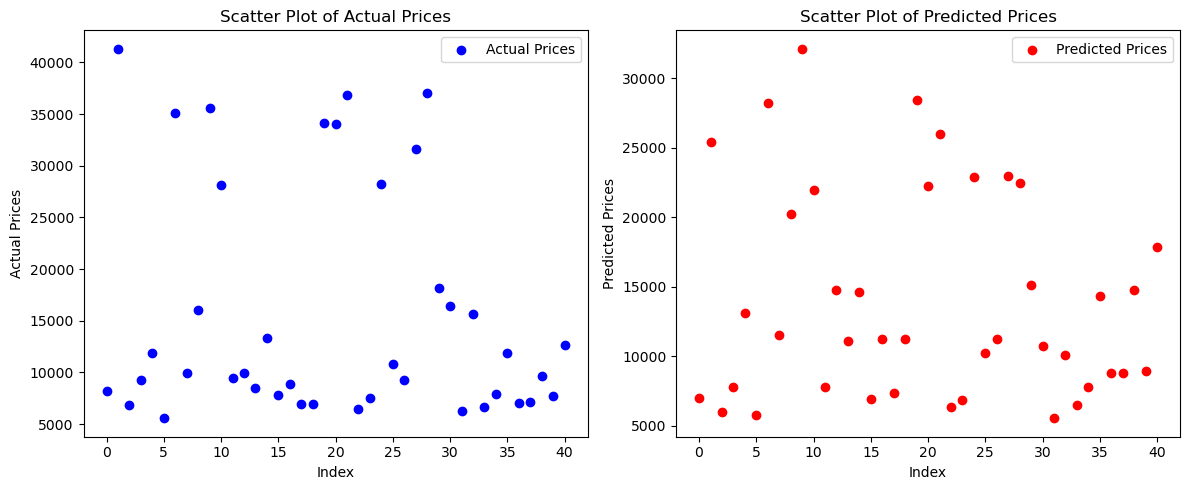

In [214]:
plt.figure(figsize=(12, 5))

# Plot Actual Prices
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices')
plt.xlabel('Index')
plt.ylabel('Actual Prices')
plt.title('Scatter Plot of Actual Prices')
plt.legend()

# Plot Predicted Prices
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Predicted Prices')
plt.title('Scatter Plot of Predicted Prices')
plt.legend()

plt.tight_layout()
plt.show()

<h3 style="color:green">Model Evaluating using visualization</h3>

In this section the MultiLinear regression model is the one being evaluated

In [215]:
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

Shape of y_test: (41,)
Shape of y_pred: (41,)


<h5 style="color:blue;">Regression Plot</h5>

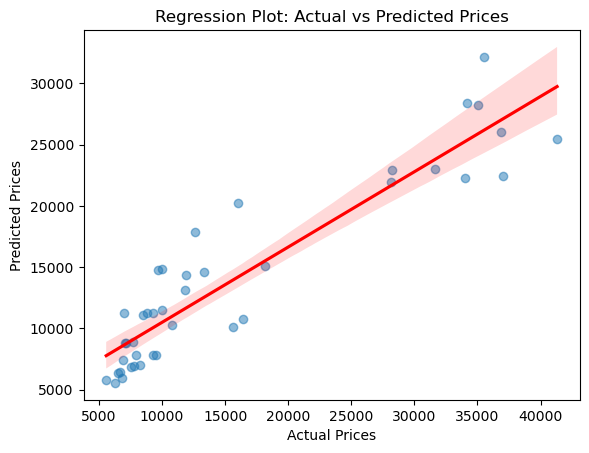

In [216]:
# Plot regression plot
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Regression Plot: Actual vs Predicted Prices')
plt.show()

<h5 style="color:blue;">Residual Plot</h5>

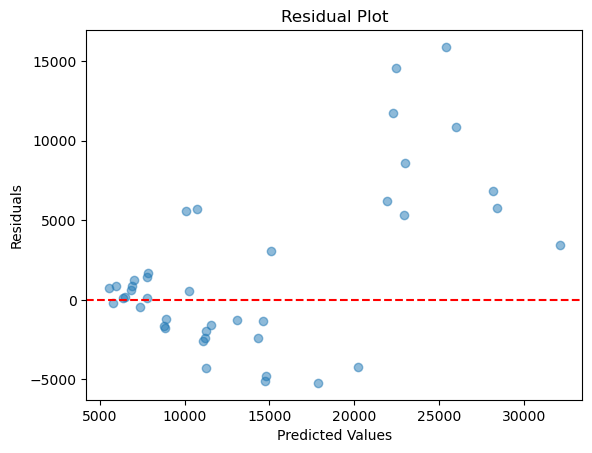

In [217]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

- **Random scatter**: If the residuals are randomly distributed around the horizontal line (y=0), the model is performing well.
- **Patterns**: If there’s a curve or trend in the residuals, the model may be missing something (e.g., non-linear relationships).

<h5 style="color:blue;">Distribution Plot</h5>

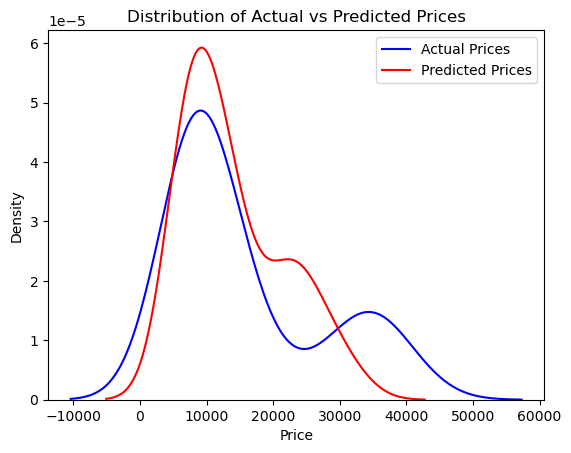

In [218]:
sns.kdeplot(y_test, label='Actual Prices', color='blue')
sns.kdeplot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Predicted Prices')
plt.legend()
plt.show()

- **Overlap**: If the distributions of actual and predicted values overlap significantly, the model is performing well.

- **Divergence**: If the distributions are far apart, the model is not capturing the data well.

<h3 style="color:blue;">Polynomial regression and pipelines</h3>

Polynomial Regression

StandardScaler is used to standardize the input data in a 
way that ensures that the data points have a balanced scale,
which is crucial for machine learning algorithms, 
especially those that are sensitive to differences in feature scales.

In [219]:

SCALE=StandardScaler()
## Computes the mean and standard deviation of the input data for each feature 

SCALE.fit(df[["horsepower", "highway-mpg"]]) 
## Transforms the input data using the mean and standard deviation calculated in the fit step
x_scale = SCALE.transform(df[["horsepower", "highway-mpg"]])
## x_scale will contain the standardized values for both horsepower and highway-mpg.


Pipelines

In [220]:
## create a list of tuples:
## 1st element contains the name of the estimator
## 2nd element contains model constructor
Input=[('scale',StandardScaler()),
       ('polynomial',PolynomialFeatures(degree=2)),
       ('mode',LinearRegression())
       ]
## create the pipeline object
pipe=Pipeline(Input)
Ypipe=df["price"]
Xpipe=df[["horsepower","curb-weight","engine-size","highway-mpg"]]
pipe.fit(Xpipe,Ypipe)

ythat=pipe.predict(Xpipe)

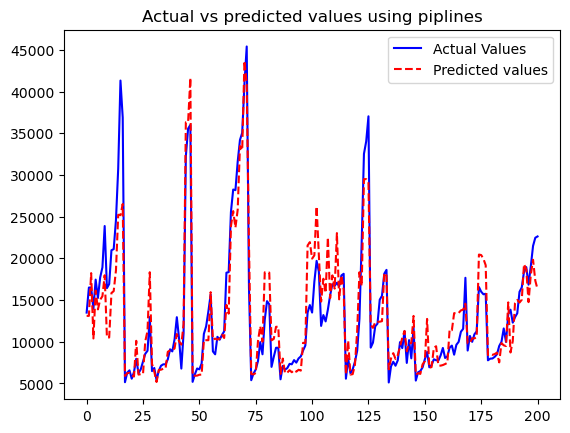

In [221]:
fig7, ax7 =plt.subplots()

ax7.plot(Ypipe.values,label="Actual Values",color="blue",linestyle="-")
ax7.plot(ythat,label="Predicted values",color="red",linestyle="--")
ax7.legend()
ax7.set_title("Actual vs predicted values using piplines")
plots.append(ax7)

<h2 style="color:green;">Measures for simple evaluation:</h2>

Using mse function

In [222]:
print("MSE of simple linear regression",mean_squared_error(df["price"],prediction))
print("MSE pipline",mean_squared_error(df["price"],ythat))

MSE of simple linear regression 31635042.944639895
MSE pipline 9655770.595172966


using the score function, the closer the value to 1 the better

In [223]:
print("The r^2 value of Simple linear regression is ", lm.score(X,Y))
print("The r^2 value of the Multi linear regression is ", lmm.score(Z,Y))

The r^2 value of Simple linear regression is  0.4965911884339175
The r^2 value of the Multi linear regression is  0.7957492288113861


<h2 style="color:green">Prediction and Decision Making
</h2>

In [224]:
new_input=np.arange(1,101,1).reshape(-1,1)
ythat_prediction_making=lm.predict(new_input)
ythat_prediction_making
ythat_prediction_making[0:5]

c:\ProgramData\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

In [225]:
negative_count = (ythat_prediction_making < 0).sum()
negative_count

54

Many values are negative, since the lm.intercept_ value is negative the array contains many negative predictions.

<h2 style="color:green;">Model Evaluation and Refinement</h2>

In [226]:
x_data=df[["wheel-base","stroke","horsepower","compression-ratio","peak-rpm","city-L/100Km"]]
y_data=df["price"]
## clean data
x_data=x_data.dropna()## drop none values 
y_data=y_data.dropna()
y_data=y_data[x_data.index] ## have the same rows for y_data
x_data.notnull().sum()

wheel-base           195
stroke               195
horsepower           195
compression-ratio    195
peak-rpm             195
city-L/100Km         195
dtype: int64

In [227]:

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)
Input2=[('scale',StandardScaler()),
       ('polynomial',PolynomialFeatures(degree=2)),
       ('mode',LinearRegression())
       ]
## create the pipeline object
pipe2=Pipeline(Input2)

pipe2.fit(x_train,y_train).score(x_test,y_test)


0.872504781774446

the score value is close to 1 which means that the pipe2 performs well

To evaluate our model we use <code>cross_val_score()</code>

#### Cross-Validation Scores
Cross-validation splits the data into multiple folds to assess model generalization. 
A negative score suggests poor performance, often due to inconsistent preprocessing or insufficient data.

Steps taken:
1. Ensure no missing values in training and testing subsets.
2. Use consistent feature scaling and transformations across all folds.

This approach helps in evaluating the model's performance more robustly.


In [228]:
score=cross_val_score(pipe2,x_data,y_data,cv=3)
score

array([ 0.42076925,  0.57034689, -0.88832759])

The cross-validation scores indicate varying model performance: fold 1 (42%), fold 2 (57%), and fold 3 (-88%). The negative score suggests poor generalization or data handling issues in specific subsets.

<h2 style="color:green;">Overfitting, Underfitting and Model Selection</h2>

#### Understanding Overfitting
Overfitting occurs when a model learns the noise or random fluctuations in the training data, 
resulting in poor generalization to unseen data. This typically happens when the model is 
too complex (e.g., high-degree polynomials).

In polynomial regression:
- Low-degree polynomials may underfit the data, failing to capture the underlying trend.
- High-degree polynomials may overfit, capturing noise instead of patterns.

The goal is to strike a balance between underfitting and overfitting, which we achieve by 
evaluating performance on training and testing data.

[0.6372664352614649,
 0.6765550910426591,
 0.7170869396014813,
 0.4791683560214527]

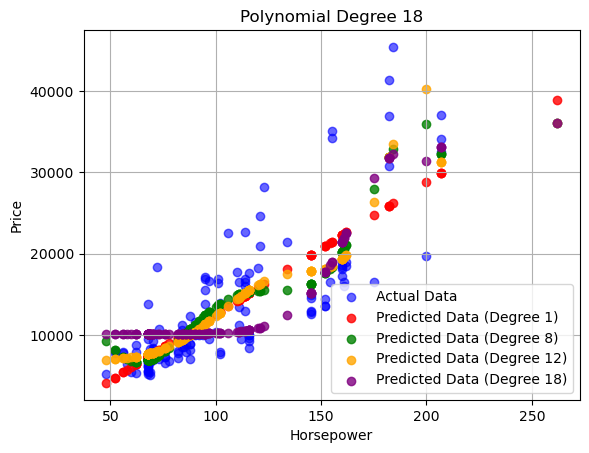

In [229]:
# Initialize an empty list to store R² scores for the test set
Rsqu_test=[]
scores=[] # to store scores of the model
# Define the polynomial degrees to iterate over
order = [1,8,12,18]
fig8, ax8= plt.subplots()
colors = ['red', 'green', 'orange', 'purple']
for i,n in enumerate(order):
    # Create a PolynomialFeatures object for the current degree
    
    pr=PolynomialFeatures(degree=n)
    # Transform the training and testing data for the 'horsepower' feature
    
    x_train_pr=pr.fit_transform(x_train[["horsepower"]])
    
    x_test_pr=pr.fit_transform(x_test[["horsepower"]])
    model=LinearRegression()
    model.fit(x_train_pr,y_train)
  
    
    Rsqu_test.append(model.score(x_test_pr,y_test))
    
    # Generate predictions for the training data
    y_train_pred = model.predict(x_train_pr)
    
     # Plot the actual data (only once, in blue)
    if i == 0:
        ax8.scatter(x_train["horsepower"], y_train, color="blue", label="Actual Data", alpha=0.6)
    
    # Plot the polynomial fit for the current degree
    ax8.scatter(
        x_train["horsepower"],
        y_train_pred,
        color=colors[i],
        label=f"Predicted Data (Degree {n})",
        alpha=0.8
    )
    
    ax8.set_title(f'Polynomial Degree {n}')
    ax8.set_xlabel('Horsepower')
    ax8.set_ylabel('Price')
    ax8.legend()
    ax8.grid(True)
    
plots.append(ax8)
Rsqu_test

Higher polynomial degrees improve data fit, with degree 18 capturing nuances but risking overfitting. Degree 12 or 8 balances simplicity and performance. Test R² confirms generalization and overfitting risks.

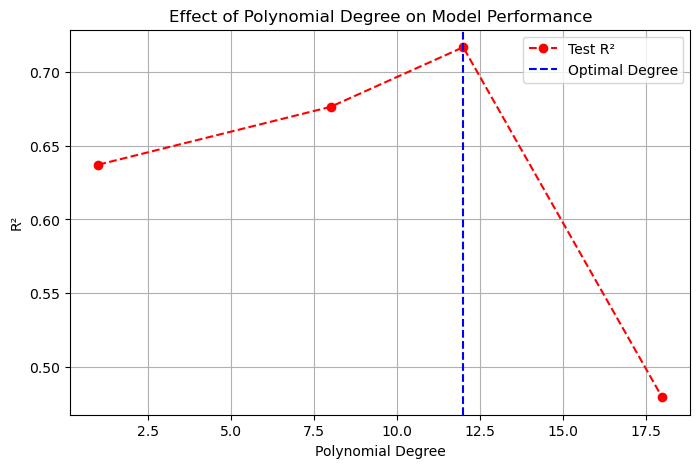

In [230]:
plt.figure(figsize=(8, 5))
plt.plot(order, Rsqu_test, label="Test R²", marker='o', linestyle='--', color='red')
plt.xlabel("Polynomial Degree")
plt.ylabel("R²")
plt.title("Effect of Polynomial Degree on Model Performance")
plt.axvline(12, color='blue', linestyle='--', label='Optimal Degree')
plt.legend()
plt.grid()
plt.show()


#### Conclusion on Overfitting
From the plot, we see that:
- Lower degrees (e.g., degree 1) underfit the data, with low R² scores.
- Higher degrees (e.g., degree 18) overfit the data, as test R² decreases despite higher training accuracy.
- Degree 12 strikes a balance, achieving the best performance on testing data.

<h2 style="color:green">Ridge Regression</h2>

#### Grid Search for Ridge Regression
Grid search is a systematic method for hyperparameter optimization. It tests different 
values of hyperparameters to find the one that maximizes model performance.

In Ridge regression:
- The regularization parameter `alpha` controls the penalty on large coefficients.
- Low `alpha` values may lead to overfitting, while high values may cause underfitting.

We use `GridSearchCV` to find the optimal `alpha` value by testing multiple candidates.

[0.8279710401720811, 0.8276404232334678, 0.8259303865333503, 0.8289358058157076, 0.8183040562907322, 0.7625621357388722]


<Axes: title={'center': 'Ridge Regression for Different Alphas'}, xlabel='Horsepower', ylabel='Price'>

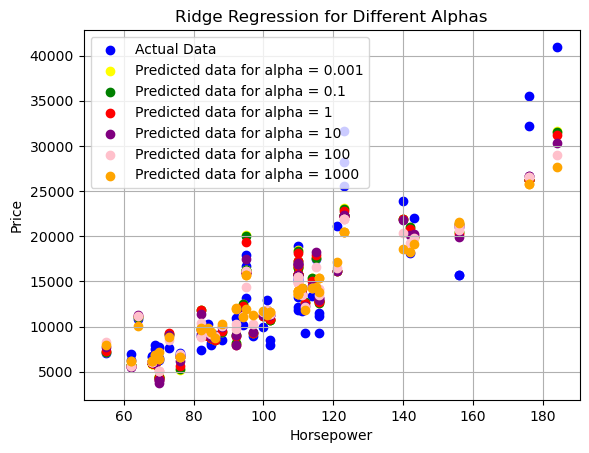

In [231]:
# List of alpha values to test the effect of regularization strength
alphas = [0.001, 0.1, 1, 10, 100, 1000]
# Initialize a list to store R² scores for each alpha
scorevalues=[]

fig9, ax9=plt.subplots()
colors=["yellow","green","red","purple","pink","orange"]
# Plot the actual data points once, in blue

ax9.scatter(x_test["horsepower"],y_test,color="b",label="Actual Data")
 
for i,alpha in enumerate(alphas):
    # Create and configure the Ridge regression model with the current alpha
    Ridgemodel=Ridge(alpha=alpha)
    
    # Create and configure the Ridge regression model with the current alpha
    Ridgemodel.fit(x_train,y_train)
    # Use the trained model to predict the target values for the test data
    yhat=Ridgemodel.predict(x_test)
    
    # Calculate the R² score for the model to assess its performance
    score=Ridgemodel.score(x_test,y_test)
    
    
    # Plot the predicted values for the current alpha as scatter points
    # Each alpha has a different color to differentiate the results
    ax9.scatter(x_test["horsepower"],yhat, color=colors[i],label=f"Predicted data for alpha = {alpha}")
    scorevalues.append(score)

ax9.set_title(f'Ridge Regression for Different Alphas')
ax9.set_xlabel('Horsepower')
ax9.set_ylabel('Price')
ax9.legend()
ax9.grid(True)
    
print(scorevalues)
plots.append(ax9)
ax9

In [232]:
mean_scores = scores["mean_test_score"][:len(alphas)]  

plt.figure(figsize=(8, 5))
plt.plot(alphas, mean_scores, marker='o', linestyle='--', color='green', label="Mean Test Score")
plt.xscale('log')  # Logarithmic scale for clarity
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Mean R² Score")
plt.title("Effect of Alpha on Model Performance")
plt.legend()
plt.grid()
plt.show()


TypeError: list indices must be integers or slices, not str

#### Conclusion on Grid Search
From the results:
- The optimal `alpha` value is 100, as it provides the highest mean test R² score.
- Increasing `alpha` beyond this point leads to underfitting, where the model becomes too simple and fails to capture meaningful patterns.

Grid search helps systematically identify the best regularization parameter to balance overfitting and underfitting.

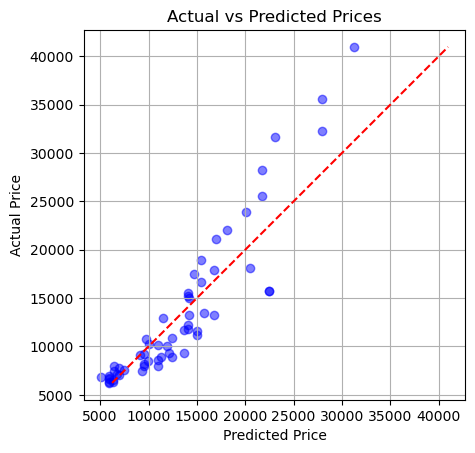

In [44]:
fig10, ax10 = plt.subplots()
ax10.scatter(yhat, y_test, color="blue", alpha=0.5)
ax10.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Identity line
ax10.set_xlabel('Predicted Price')
ax10.set_ylabel('Actual Price')
ax10.set_title('Actual vs Predicted Prices')
ax10.grid(True)
ax10.set_aspect('equal', 'box')
plots.append(ax10)
plt.show()


Residual plot

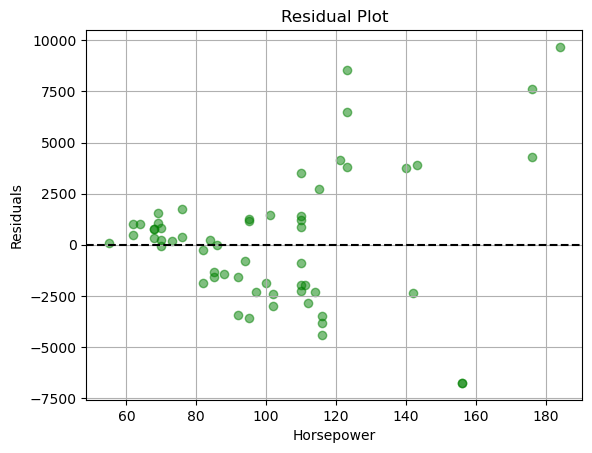

In [ ]:
# Check and reshape dimensions if needed
yhat = yhat.flatten() if len(yhat.shape) > 1 else yhat

# Residual Plot
residuals = y_test.values - yhat  # Ensure consistent dimensions
fig11, ax11 = plt.subplots()
ax11.scatter(x_test["horsepower"], residuals, color="green", alpha=0.5)
ax11.axhline(0, color='black', linestyle='--')
ax11.set_xlabel('Horsepower')
ax11.set_ylabel('Residuals')
ax11.set_title('Residual Plot')
ax11.grid(True)
plots.append(ax11)
plt.show()


In the residual plot, if the model's predictions are unbiased, the residuals will be randomly scattered around the zero line. A systematic pattern would suggest that the model is not capturing some important aspect of the data.

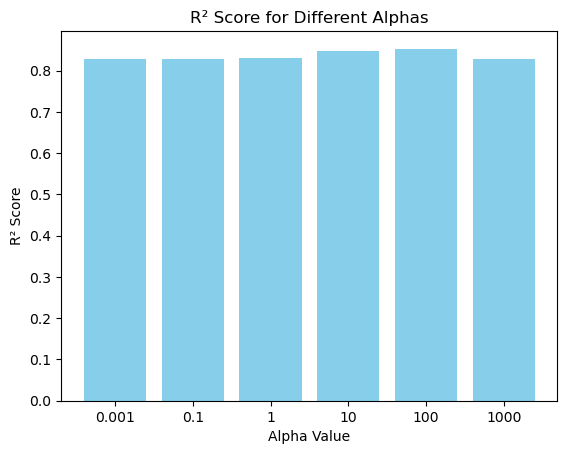

In [46]:
fig12, ax12 = plt.subplots()
ax12.bar([str(alpha) for alpha in alphas], scorevalues, color='skyblue')
ax12.set_xlabel('Alpha Value')
ax12.set_ylabel('R² Score')
ax12.set_title('R² Score for Different Alphas')
plots.append(ax12)
plt.show()


The bar plot allows you to quickly compare how different values of alpha impact the model's ability to explain the variance in the data.


<h2 style="color:green">Grid Search</h2>

<h5 style="color:blue;">without normalizing data </h5>

In [47]:
# Define a list of hyperparameters (alphas) to test during the grid search.
# Each value of alpha corresponds to the regularization strength in Ridge Regression.

parameters1=[{
    "alpha":[0.001,0.1,1,10,100,1000,10000,100000,1000000],
    
}]
# Initialize the Ridge Regression model

rr=Ridge()

# Set up GridSearchCV to find the best value of alpha for Ridge Regression.
# - `cv=4` means 4-fold cross-validation will be used to evaluate each model.
grid1=GridSearchCV(rr,parameters1,cv=4)

grid1.fit(x_data,y_data)

# Retrieve the best estimator (model) found during the grid search.
# This gives the Ridge model configured with the optimal value of alpha.
grid1.best_estimator_

# Get the cross-validation results as a dictionary.
# Each key corresponds to a metric or information, such as mean scores.
scores=grid1.cv_results_
scores["mean_test_score"]

array([0.5672412 , 0.56761469, 0.57051965, 0.58118787, 0.58100192,
       0.58220936, 0.57307332, 0.49972126, 0.04704099])

The results represent R² scores for different alpha values; optimal performance peaks near alpha = 1000 (0.5822), decreasing beyond.

<h5 style="color:blue;">with normalizing data </h5>

In [48]:
# Define a list of hyperparameters (alphas) to test during the grid search.
# Each value of alpha corresponds to the regularization strength in Ridge Regression.
# Define a pipeline that scales the data and then applies Ridge regression.
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    ("ridge", Ridge())            # Apply Ridge regression
])

# Define the grid of hyperparameters to search
parameters2 = {
    "ridge__alpha": [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]  # Alpha values for Ridge
}
# Initialize the Ridge Regression model

rr=Ridge()

# Set up GridSearchCV to find the best value of alpha for Ridge Regression.
# - `cv=4` means 4-fold cross-validation will be used to evaluate each model.
grid1=GridSearchCV(pipeline,parameters2,cv=4)

grid1.fit(x_data,y_data)

# Retrieve the best estimator (model) found during the grid search.
# This gives the Ridge model configured with the optimal value of alpha.
grid1.best_estimator_

# Get the cross-validation results as a dictionary.
# Each key corresponds to a metric or information, such as mean scores.
scores=grid1.cv_results_
scores["mean_test_score"]

array([ 0.56724508,  0.56799936,  0.57409514,  0.60396007,  0.6211162 ,
        0.28932385,  0.01696934, -0.02524659, -0.02968878])


The results represent 
𝑅
2
R 
2
  scores for Ridge regression with increasing regularization strength (alpha). Initially, performance improves (
𝑅
2
≈
0.62
R 
2
 ≈0.62), but excessive regularization causes underfitting, lowering scores below zero.